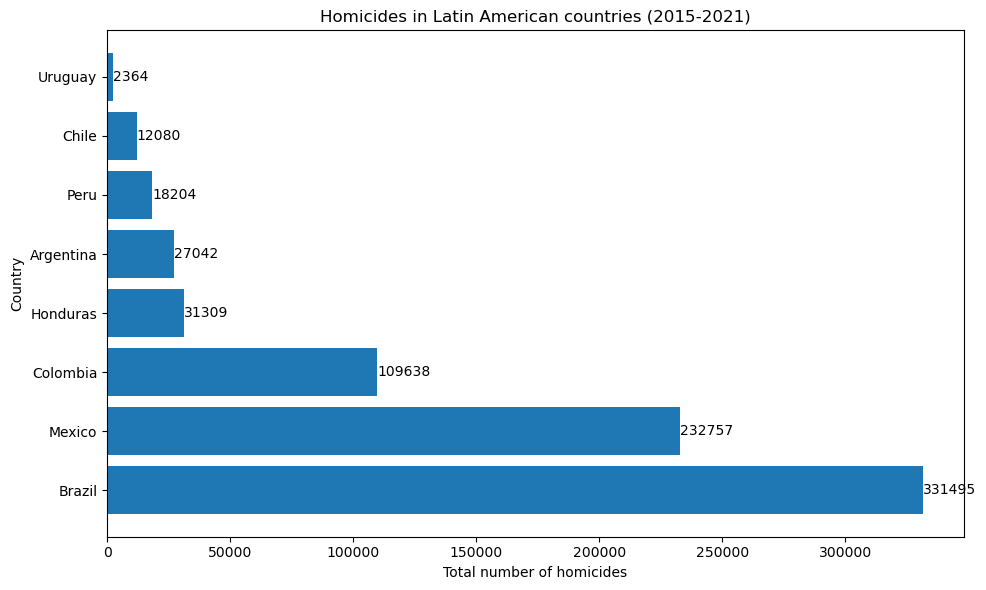

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://dataunodc.un.org/sites/dataunodc.un.org/files/data_cts_intentional_homicide.xlsx'
df = pd.read_excel(url, header=2)

# Filter the data for the total of Year, Dimension, Category, and Sex
df_filtered = df[(df['Year'].between(2015, 2021)) & (df['Dimension'] == 'Total') & (df['Category'] == 'Total') & (df['Sex'] == 'Total') & (df['Unit of measurement'] == 'Counts')]

# Select the desired countries
selected_countries = ['Argentina', 'Brazil', 'Mexico', 'Colombia', 'Chile', 'Peru', 'Honduras', 'Uruguay']
df_selected = df_filtered[df_filtered['Country'].isin(selected_countries)]

# Group by country to calculate the total number of homicides
df_grouped = df_selected.groupby('Country')['VALUE'].sum().reset_index()

# Sort the countries in descending order of homicides
df_grouped = df_grouped.sort_values('VALUE', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_grouped['Country'], df_grouped['VALUE'])
plt.xlabel('Total number of homicides')
plt.ylabel('Country')
plt.title('Homicides in Latin American countries (2015-2021)')

# Add value labels on the bars
for i, value in enumerate(df_grouped['VALUE']):
    plt.text(value, i, str(int(value)), ha='left', va='center')

plt.tight_layout()  # Adjust spacing
plt.show()



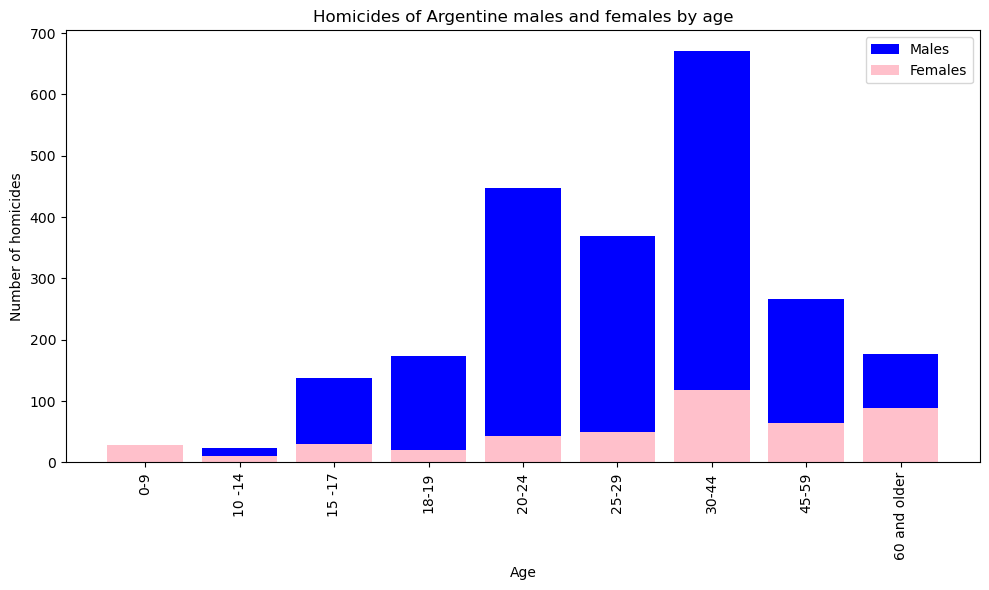

In [37]:
# Filter the data for Argentina and relevant columns
df_argentina = df[df['Country'] == 'Argentina']

# Get the data for homicides of males and females by age
df_male = df_argentina[(df_argentina['Sex'] == 'Male') & (df_argentina['Age'] != 'Total') & (df_argentina['Age'] != 'Unknown')]
df_female = df_argentina[(df_argentina['Sex'] == 'Female') & (df_argentina['Age'] != 'Total') & (df_argentina['Age'] != 'Unknown')]

# Extract age, male values, and female values
ages = df_male['Age'].values.tolist()
male_values = df_male['VALUE'].values.tolist()
female_values = df_female['VALUE'].values.tolist()

# Create the bidirectional bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(ages, male_values, color='blue', label='Males')
ax.bar(ages, female_values, color='pink', label='Females')

ax.set_xlabel('Age')
ax.set_ylabel('Number of homicides')
ax.set_title('Homicides of Argentine males and females by age')

ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

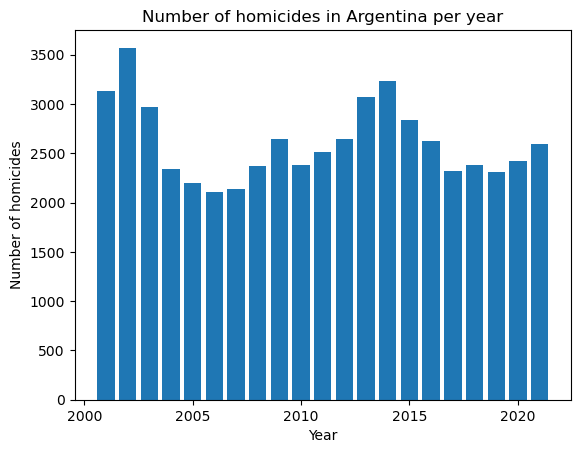

In [39]:
# Filter the data for the Argentina region and select relevant columns
df_argentina = df[df['Iso3_code'] == 'ARG']
df_yearly = df_argentina[['Year', 'VALUE']].copy()

# Convert the values in the 'Unnamed: 11' column to float
df_yearly.loc[:, 'VALUE'] = pd.to_numeric(df_yearly['VALUE'], errors='coerce')

# Create the bar chart
plt.bar(df_yearly['Year'], df_yearly['VALUE'])

# Set the axis labels
plt.xlabel('Year')
plt.ylabel('Number of homicides')

# Chart title
plt.title('Number of homicides in Argentina per year')

# Display the chart
plt.show()

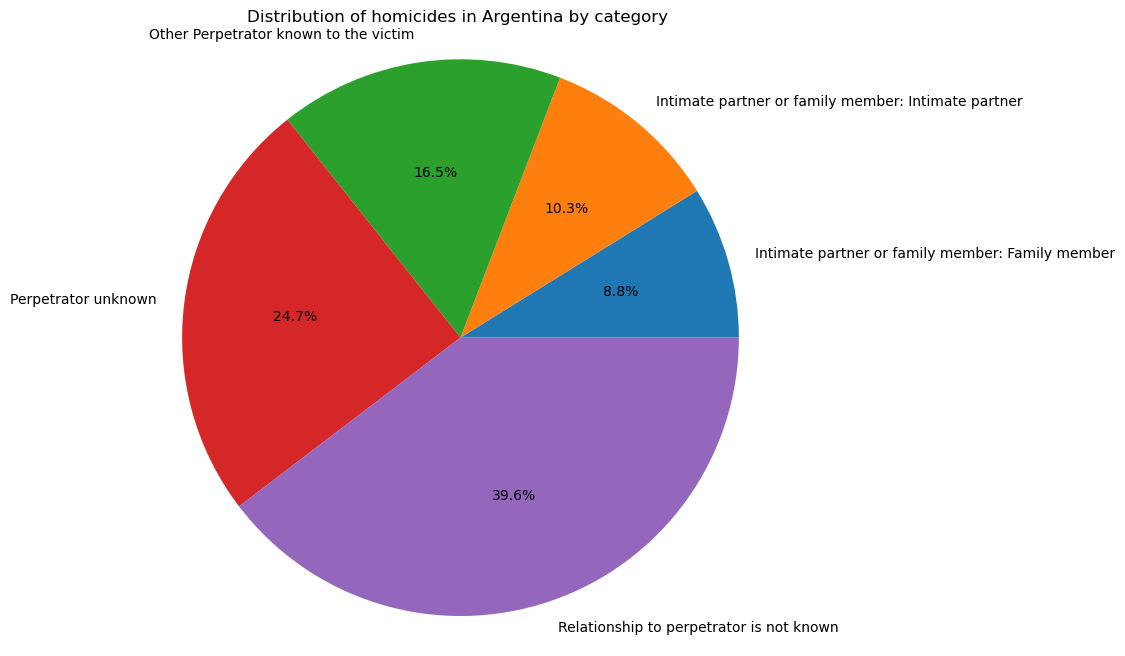

In [40]:
# Filter the data for Argentina and select relevant columns
df_argentina = df[df['Country'] == 'Argentina']

# Filter the data for specific categories
selected_categories = [
    'Intimate partner or family member: Family member',
    'Intimate partner or family member: Intimate partner',
    'Other Perpetrator known to the victim',
    'Perpetrator unknown',
    'Relationship to perpetrator is not known'
]
df_selected = df_argentina[df_argentina['Category'].isin(selected_categories)]

# Group by category to calculate the total number of homicides
df_grouped = df_selected.groupby('Category')['VALUE'].sum().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_grouped['VALUE'], labels=df_grouped['Category'], autopct='%1.1f%%')
plt.title('Distribution of homicides in Argentina by category')

plt.axis('equal')  # Circle aspect ratio
plt.show()

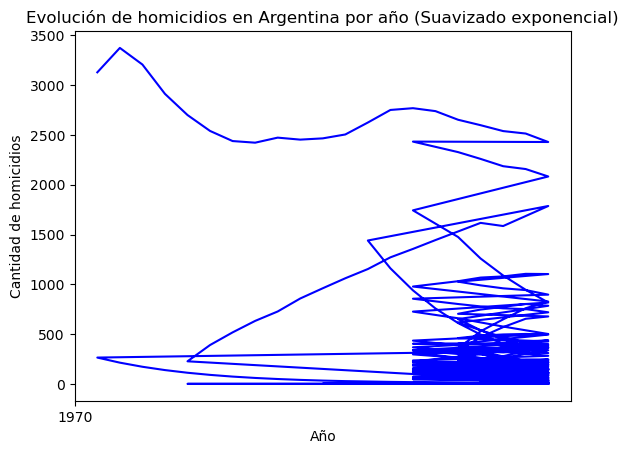

In [53]:
import pandas as pd

url = 'https://dataunodc.un.org/sites/dataunodc.un.org/files/data_cts_intentional_homicide.xlsx'
df = pd.read_excel(url, header=2)

# Eliminar filas con valores faltantes
df = df.dropna()

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir columnas a tipos de datos adecuados
df['Year'] = pd.to_datetime(df['Year'])
df['VALUE'] = pd.to_numeric(df['VALUE'])

# Filtrar datos no deseados
df = df[df['VALUE'] > 0]

# Reindexar el DataFrame
df = df.reset_index(drop=True)

# Guardar los datos limpios en un nuevo archivo
df.to_excel('datos_limpios.xlsx', index=False)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar los datos para Argentina y las columnas relevantes
df_argentina = df[df['Country'] == 'Argentina']

# Obtener los datos de homicidios por año
df_yearly = df_argentina[['Year', 'VALUE']].copy()

# Convertir los valores en la columna 'VALUE' a números flotantes
df_yearly['VALUE'] = pd.to_numeric(df_yearly['VALUE'], errors='coerce')

# Aplicar suavizado exponencial utilizando el método de pandas
df_yearly['Exponential Smoothing'] = df_yearly['VALUE'].ewm(alpha=0.2).mean()

# Visualizar los resultados
plt.plot(df_yearly['Year'], df_yearly['Exponential Smoothing'], c='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de homicidios')
plt.title('Evolución de homicidios en Argentina por año (Suavizado exponencial)')
plt.show()

